<H4 align='left'>12/10/2017</H4> <H4 align='right' >E-63 Big Data Analytics</H4>



<H2 align='center'>Crime Scene Rochester NY </H2>
<H4 align='center'>A Big Data Case Study in Social Sciences</H4>
<H4 align='right'>By : Ajay Antony Kliyara Philip</H4>

<H2 align='center'> Part 1 : Exploratory Data Analysis </H2>


In [1]:
#importing required primary packages
import pandas as pd
import numpy as np
import time

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#mapping 
import folium

In [2]:
#reading data from csv
crime_raw_data = pd.read_csv('data/rpd_crime_2011_to_present.csv')

In [4]:
print("Shape of imported data file {}".format(crime_raw_data.shape))

Shape of imported data file (76228, 40)


In [5]:
#sample data
crime_raw_data.head(2)

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,-77.643682,43.154498,2001,"166 Syke St, Rochester, NY, 14611",166 SYKE ST,2011-00060353,2011,2,1200,2011-02-21T12:00:00.000Z,...,Burglary,Burglary 3rd: Illegal Entry with Intent to Com...,5,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,203.0,Genesee,3.0
1,-77.643582,43.177149,2002,"506 Glenwood Ave, Rochester, NY, 14613",506 GLENWOOD AVE,2013-00070133,2013,3,2130,2013-03-16T21:30:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Motor Vehicle,Street,241.0,Lake,1.0


In [7]:
#all attributes in the data
crime_raw_data.columns

Index(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category', 'Statute_Text',
       'Statute_Description', 'Statute_CrimeCategory', 'Statute_Attempted',
       'Weapon_Description', 'Larceny_Type', 'Location_Type', 'Geo_Beat',
       'Geo_Section', 'Geo_Section_Num'],
      dtype='object')

In [6]:
#installing folium to enable easy viewing of data on a map
!pip install folium

In [9]:
#How to use folium to generate maps
#reference : https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

In [10]:
#unique list of crime types in the data
crime_type_list = list(crime_raw_data.Statute_Text.unique())
crime_type_list

['Burglary',
 'Larceny',
 'Aggravated Assault',
 'Motor Vehicle Theft',
 'Robbery',
 'Murder',
 'Non-Negligent Manslaughter']

In [12]:
#color palette for various crime types
col_palette = sns.color_palette("hls", 8)
col_palette_hex = col_palette.as_hex()
col_palette_hex

['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

In [14]:
#plotting 1000 observations on a map

#coordinates of Rochester, NY
ROC_COORDINATES = (43.16, -77.61)

# for speed purposes
MAX_RECORDS = 1000
 
# create empty map zoomed in on Rochester, NY
map = folium.Map(location=ROC_COORDINATES, tiles='Stamen Toner', zoom_start=12)

#start time 
start_time = time.time()

# add a marker for every record in the filtered data, use a clustered view
for each in crime_raw_data[0:MAX_RECORDS].iterrows():
    if(not np.isnan(each[1]['X'])):
        location = [each[1]['Y'],each[1]['X']]
        tooltip = 'city : ' + each[1]['Address_City'] + '\n crime type : ' + each[1]['Statute_Text']
        index = crime_type_list.index(each[1]['Statute_Text'])
        col = col_palette_hex[index]
        folium.CircleMarker(location,
                        radius=2,
                        popup=tooltip,
                        color=col,
                        fill_color=col,
                       ).add_to(map)


#capturing execuation time
print("---Execution Time {} minutes ---".format((time.time() - start_time)/60))
map

---Execution Time 0.8043195009231567 minutes ---


In [15]:
#building legend for above map
import branca.colormap as cm
step = cm.StepColormap(
    col_palette_hex,
    vmin=0, vmax=14,
    index=[0, 2, 4, 6, 8, 10, 12]
)

print(crime_type_list)
step



['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [16]:
#converting city names to upper for uniformity
crime_raw_data.loc[:,['Address_City']] = crime_raw_data.Address_City.apply(str.upper)

In [18]:
#summarizing data by City and Crime type
#It is evident that bulk of the data is concentrated in Rochester as one would except, there are few anomolies which
#are filterd out from the data
crime_raw_data.groupby(['Address_City','Statute_Text']).size()

Address_City   Statute_Text              
***            Aggravated Assault               39
               Burglary                        113
               Larceny                         501
               Motor Vehicle Theft              32
               Robbery                          42
AUBURN         Motor Vehicle Theft               1
BATH           Motor Vehicle Theft               1
BRIGHTON       Larceny                           1
               Motor Vehicle Theft               3
BROCKPORT      Motor Vehicle Theft               1
EDISON         Aggravated Assault                1
FAIRPORT       Motor Vehicle Theft               1
GATES          Larceny                           1
               Motor Vehicle Theft               4
GREECE         Aggravated Assault                1
               Motor Vehicle Theft               4
HENRIETTA      Larceny                           1
IRONDEQUOIT    Motor Vehicle Theft               6
MONROE COUNTY  Motor Vehicle Theft      

In [19]:
#only retaining rochester data
roc_crime_data = crime_raw_data.loc[crime_raw_data.Address_City=='ROCHESTER',:]
roc_crime_data.shape

(75468, 40)

In [21]:
#again aggregating data to ensure only Rochester is left
roc_crime_agg = roc_crime_data.groupby(['Address_City','Statute_Text']).size()
roc_crime_agg

Address_City  Statute_Text              
ROCHESTER     Aggravated Assault             6370
              Burglary                      14931
              Larceny                       44630
              Motor Vehicle Theft            4171
              Murder                          222
              Non-Negligent Manslaughter       12
              Robbery                        5132
dtype: int64

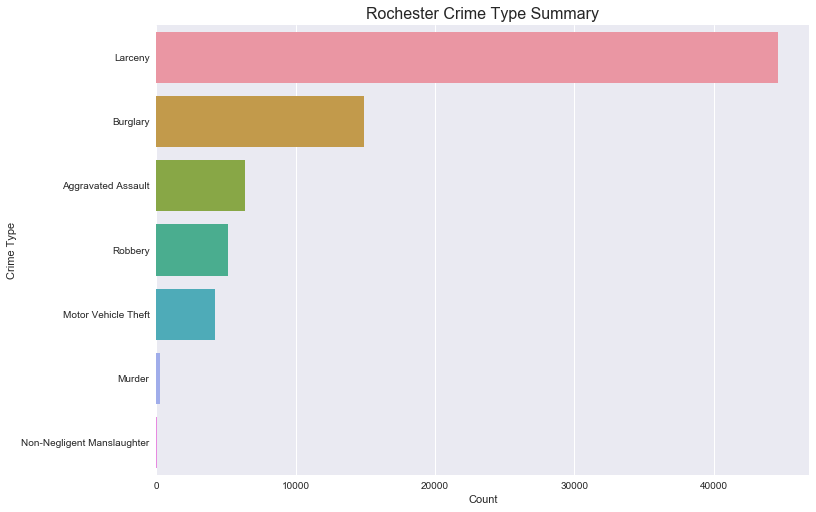

In [22]:
#summary bar charts using matplotlib
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
bar_data = roc_crime_agg.reset_index()
bar_data = bar_data.sort_values(by=0,ascending=False)
sns.barplot(y="Statute_Text", x=0, data=bar_data, ax = ax)
ax.set_xlabel('Count')
ax.set_ylabel('Crime Type')
ax.set_title('Rochester Crime Type Summary',size=16)
plt.show()

<b>Larceny is most frequent crime type which is nearly 3 times more than the next type burglary. It is good to see that murder is almost negligible.<b>

In [28]:
#unique list of crime of committed in rochester
roc_crime_list = list(roc_crime_data.Statute_Text.unique())
print(roc_crime_list)

['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [24]:
#magic command to display charts inline
#%pylab
%matplotlib inline

In [25]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [26]:
#setting new color pallete for subsequent plots
col_palette2 = sns.color_palette("Set2", 10)
col_palette2_hex = col_palette2.as_hex()
col_palette2_hex

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3',
 '#66c2a5',
 '#fc8d62']

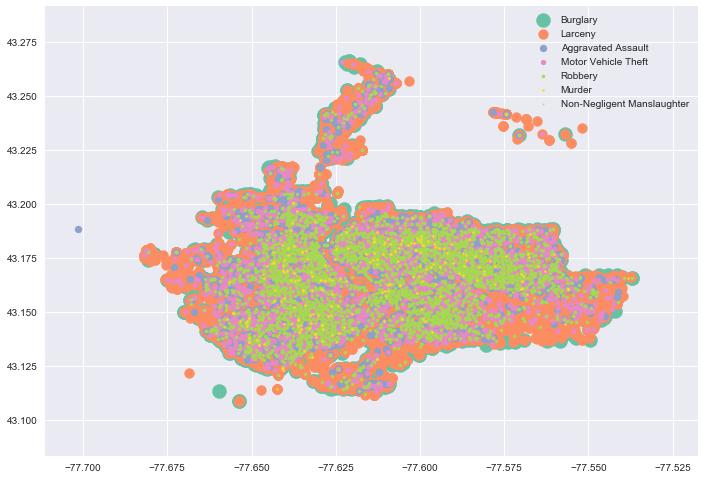

In [29]:
#using matplotlib to visualize all observations. Each crime type of given a different point size. This was done to help 
#visualize overalapping points.
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
#size = range(140,0,-20)
size = [200,100,50,25,10,5,2]

plt.ion()
#plt.figure()
for crime in roc_crime_list:
    i = roc_crime_list.index(crime)
    temp_crime_data = roc_crime_data.loc[roc_crime_data.Statute_Text==crime,:]
    ax.scatter(temp_crime_data.X, temp_crime_data.Y, color=col_palette2_hex[i],label=crime, s=size[i])
    ax.legend()


<b> There seems to be larger concentration of crime at center city which is primarily downtown rochester. That said in the 2D view there does not seem to a specific area more prone to a crime time. It seems to be more less uniformly distributed.</b>

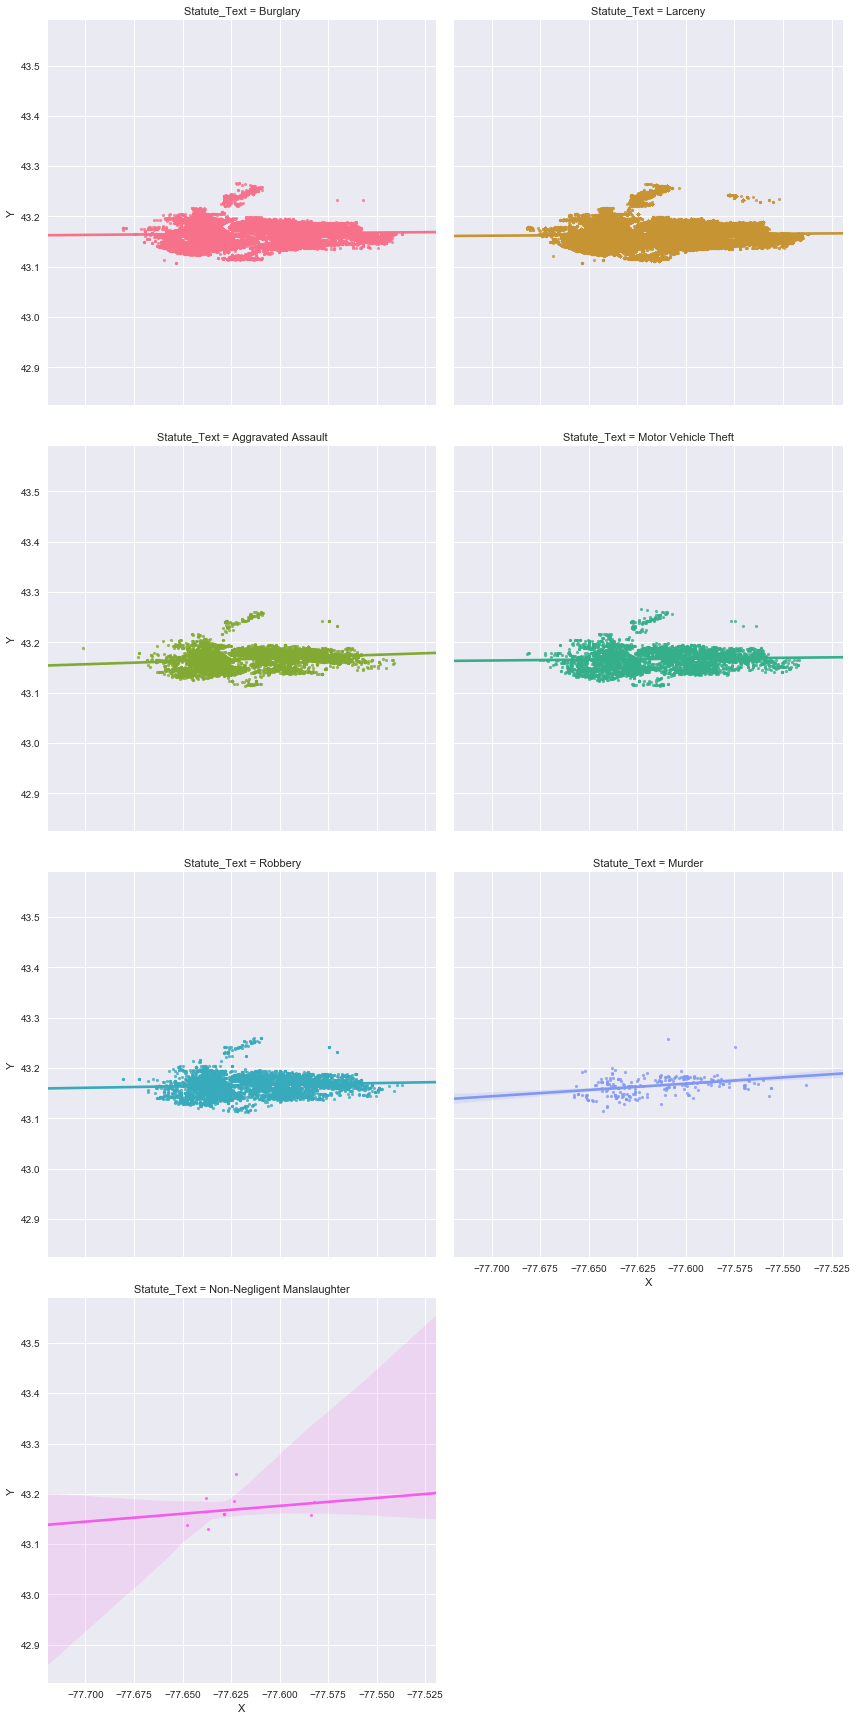

In [24]:
#scatter plot for each type of crime
sns.lmplot(x="X", y="Y", data=roc_crime_data, hue='Statute_Text',col='Statute_Text',size=6, col_wrap=2,
          scatter_kws={"s": 10})

<b> One can observe the more violent crime types are concentrated at the city center. There seems to be zig zag line passing cutting through the city which has no instances of crime. It was found that it is where the genesee river flows through </b>

In [32]:
#aggregating data by year and crime type
roc_crime_year_agg = roc_crime_data.groupby(['Statute_Text','OccurredFrom_Date_Year']).size()
roc_crime_year_agg

Statute_Text                OccurredFrom_Date_Year
Aggravated Assault          2011                      1060
                            2012                      1016
                            2013                       942
                            2014                       774
                            2015                       890
                            2016                       855
                            2017                       833
Burglary                    2011                      3164
                            2012                      2724
                            2013                      2515
                            2014                      2097
                            2015                      1736
                            2016                      1458
                            2017                      1237
Larceny                     2011                      7602
                            2012                      7390
     

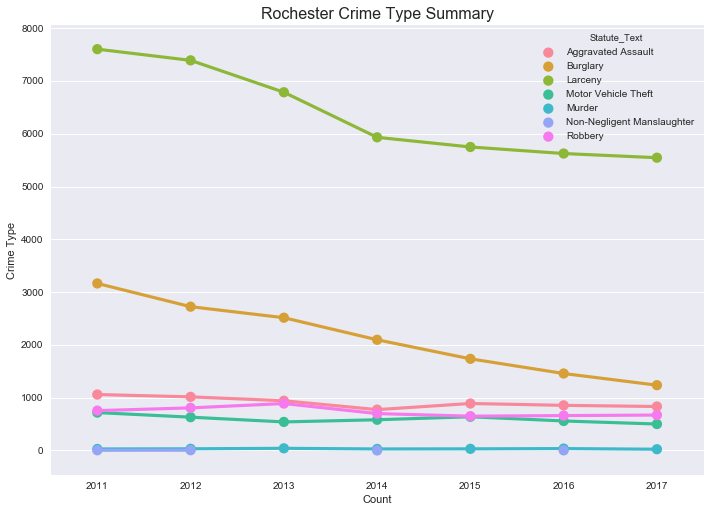

In [33]:
#visualizing yearly trend by crime type
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
year_data = roc_crime_year_agg.reset_index()
#year_data = bar_data.sort_values(by=0,ascending=False)
sns.pointplot(y=0, x='OccurredFrom_Date_Year', data=year_data, hue= 'Statute_Text', ax = ax)
ax.set_xlabel('Count')
ax.set_ylabel('Crime Type')
ax.set_title('Rochester Crime Type Summary',size=16)

<b>It was observed that most of the crimes were showing a downward trend, which is heartening.</b>

In [34]:
#aggregating data by year and month and crime type
roc_crime_year_month_agg = roc_crime_data.groupby(['Statute_Text','OccurredFrom_Date_Year','OccurredFrom_Date_Month']).size()
roc_crime_year_month_agg.head()

Statute_Text        OccurredFrom_Date_Year  OccurredFrom_Date_Month
Aggravated Assault  2011                    1                           82
                                            2                           57
                                            3                           84
                                            4                           85
                                            5                          115
dtype: int64

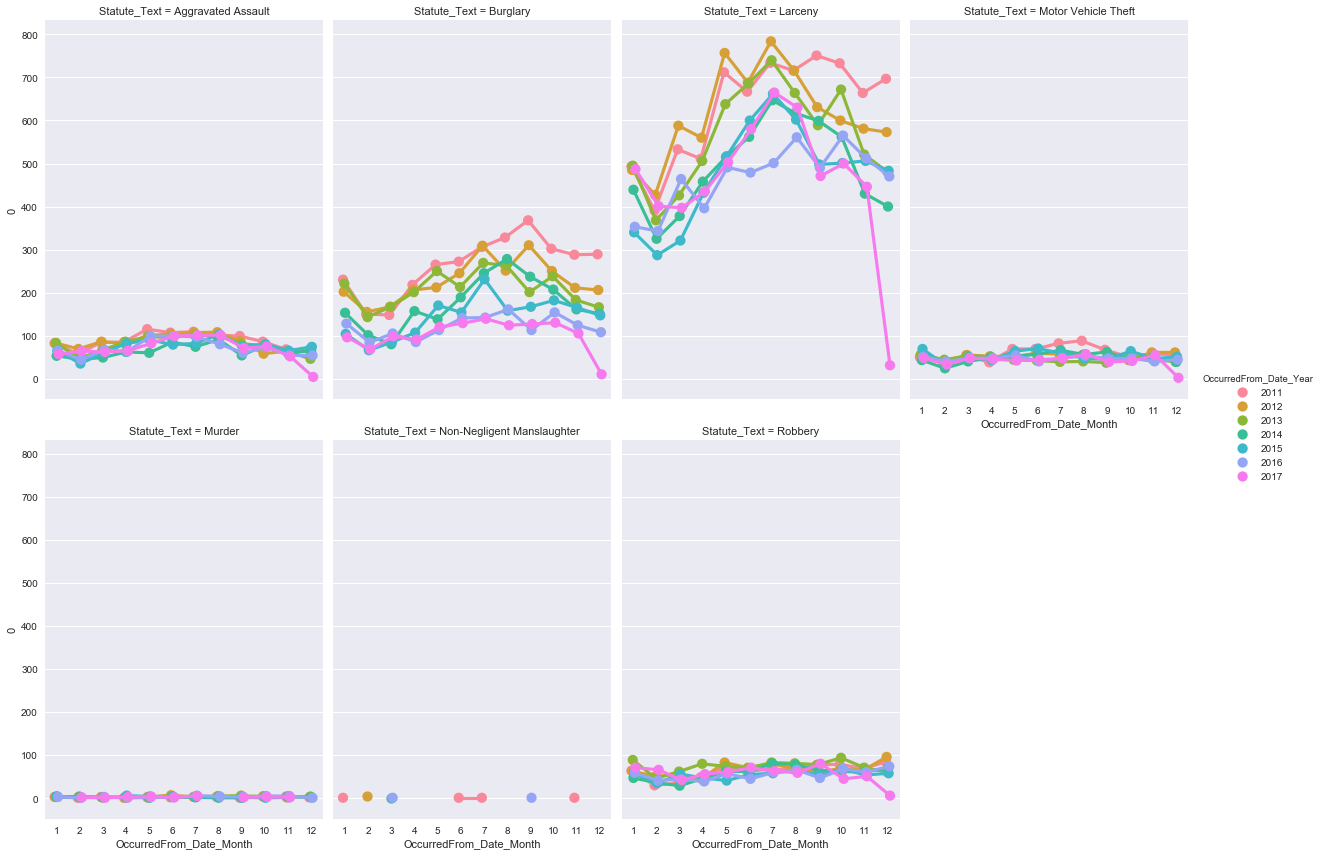

In [28]:
#plotting data by crime type and month with a line for every year.
year_month_data = roc_crime_year_month_agg.reset_index()
#year_data = bar_data.sort_values(by=0,ascending=False)
sns.factorplot(y=0, x='OccurredFrom_Date_Month', data=year_month_data, hue= 'OccurredFrom_Date_Year', 
              col="Statute_Text", kind="point", dodge=True, size=6, aspect=.7, col_wrap=4)


<b> It is observed that crime like Larceny and Robbery tend to peak in the summer months, probably due to severe winters in rochester resulting in reduced human activity.<b>

In [36]:
#bucketing by hours
roc_crime_data.loc[:,'OccurredFrom_Hour'] = roc_crime_data.OccurredFrom_Time  // 100

/Users/ajaykliyara/anaconda_py3/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
time_month_overall = roc_crime_data.groupby(['OccurredFrom_Date_Month','OccurredFrom_Hour']).size()
time_month_overall = time_month_overall.reset_index()
time_month_overall_pivot = time_month_overall.pivot('OccurredFrom_Date_Month','OccurredFrom_Hour',0)
time_month_overall_pivot.head()

OccurredFrom_Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
OccurredFrom_Date_Month,,,,,,,,,,,,,,,,,,,,,
1,334,151,138,81,62,53,87,145,227,225,...,293,317,315,315,319,337,281,252,264,257
2,240,137,110,56,50,31,68,96,186,163,...,244,249,237,248,245,222,223,198,200,178
3,294,146,114,77,60,48,83,132,201,242,...,258,278,273,283,280,247,289,272,262,231
4,321,142,134,71,61,55,86,132,196,249,...,261,299,289,315,330,292,288,325,333,297
5,417,216,153,104,79,73,98,157,274,258,...,337,417,360,403,385,365,357,394,389,336


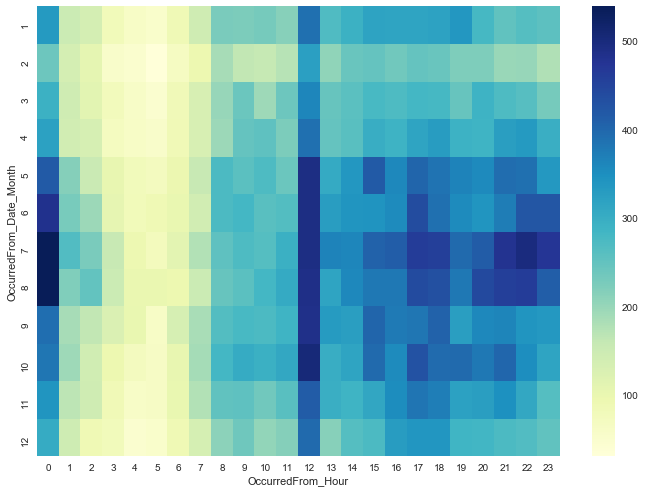

In [38]:
#heatmap of all crime events , hour of even Vs month of year
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(time_month_overall_pivot, cmap="YlGnBu", ax=ax)

<b> Summer months and 6pm to 2am seems to be the peak hours for all types of crime </b>

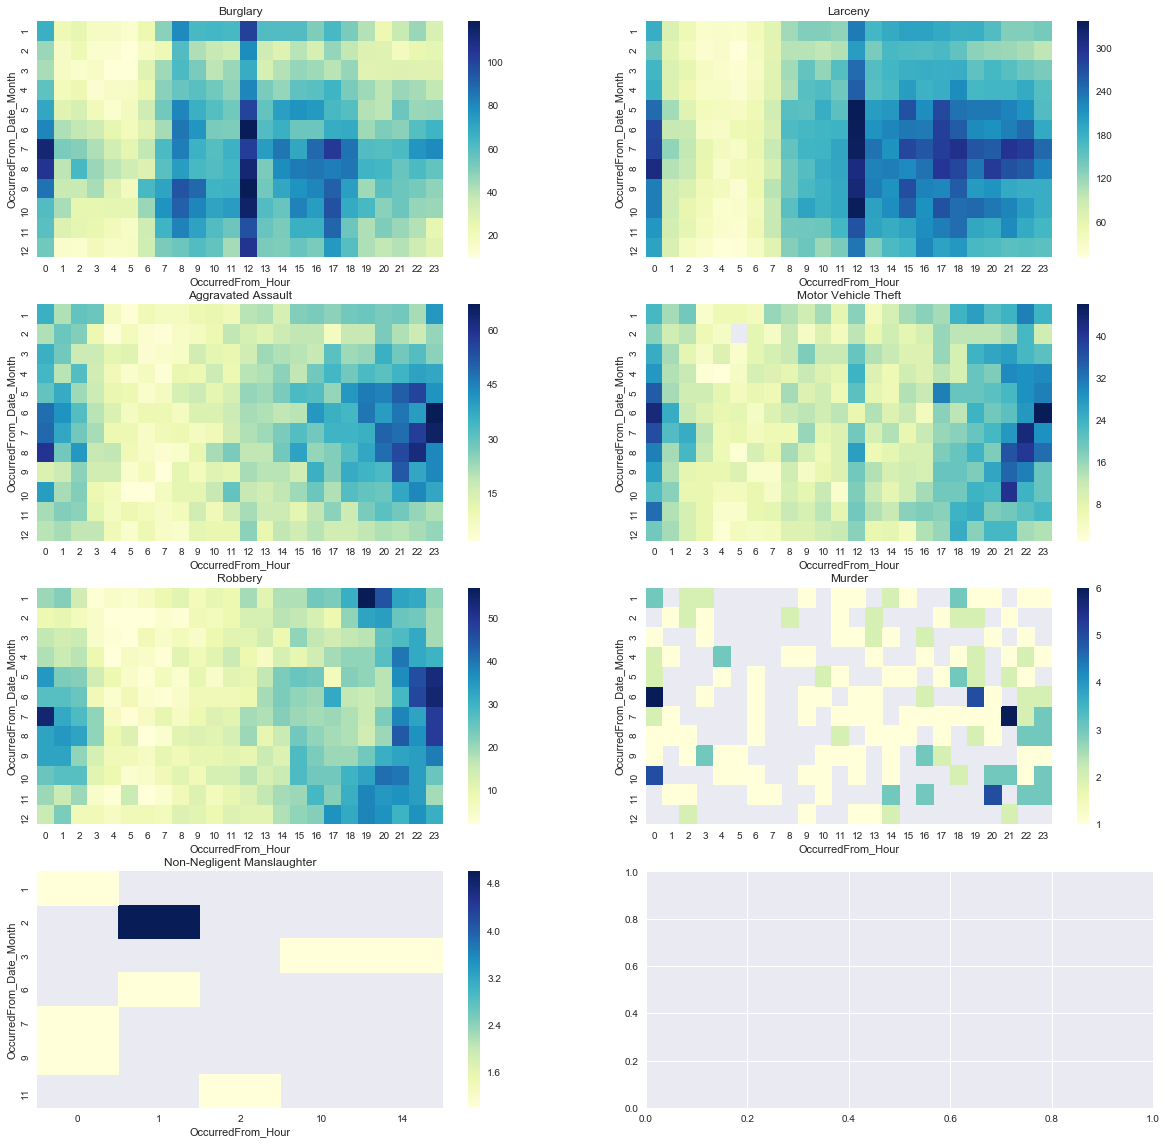

In [39]:
#heatmap for each crime type
fig, ax = plt.subplots(4,2)
# the size of A4 paper
fig.set_size_inches(20, 20)

ctr = 0
for i in range(4):
    for j in range(2):
        if(ctr>6):
            break
        else:
            crime = roc_crime_list[ctr]
            time_month_overall_sp = roc_crime_data.loc[roc_crime_data.Statute_Text==crime,:].groupby(['OccurredFrom_Date_Month','OccurredFrom_Hour']).size()
            time_month_overall_sp = time_month_overall_sp.reset_index()
            time_month_overall_sp_pivot = time_month_overall_sp.pivot('OccurredFrom_Date_Month','OccurredFrom_Hour',0)
            #fig, ax = plt.subplots()
            # the size of A4 paper
            #fig.set_size_inches(11.7, 8.27)
            #print(i,j)
            sns.heatmap(time_month_overall_sp_pivot, cmap="YlGnBu", ax=ax[i][j])
            ax[i][j].set_title(crime)
            ctr+=1


<H4>Exploratory Analysis Conclusion</H4>
<b>From the exploration of data one can conclude that location plays a important role, areas at the center of the city is more crime prone. Likewise it was also observed that time of the year and day also has an influence on the type of crime.</b>
